### Predicting trends in the quality of state-of-the-art neural networks without access to training or testing data

Martin, C. H., S. Peng, Mahoney, M. W. (2020). 


Claim:

We can look at the spectrum of the weight matrices of the layers and figure out generalization properties
of a neural network



### Motivation:

Image similarity : take pretrained network, fine-tune on custom dataset (noisy), use PCA of embeddings for similarity search.


Observation:
Mxnet resnet50 worked much better for similarity than pytorch resnet50. Why?

1. Reported test error were very similar. So how do we explain?

2. What if we don't have access to training/testing data? 

3. use resnet or resnext or densnet or ...?


## Why should we care?


1. comparing different models trained using Auto-ML (in addition to standard cross-validation)

2. judging the quality of NLP models for generating text (in addition to, say, the perplexity)

3. evaluating different unsupervised clustering models, to determine which (presumably) gives the best clusters

4. deciding if we have enough data, or need to add more, for our specific model or series of models.

## SVD and EVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

In [4]:
μ = X.mean(axis = 0)
Xc = X - μ
C = Xc.T @ Xc * 1/(Xc.shape[0])

e, V = np.linalg.eig(C)

Xk = X @ V[:,:2]

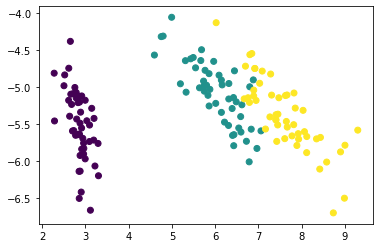

In [7]:
plt.scatter(Xk[:,0],Xk[:,1], c=y)

In [8]:
U, s, Vt = np.linalg.svd(Xc)
V = Vt.T
Xk = X @ V[:,:2]

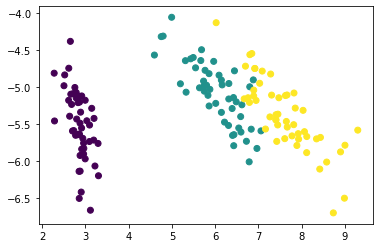

In [9]:
plt.scatter(Xk[:,0],Xk[:,1], c=y)

In [10]:
X = np.random.randn(500,500)
s = np.linalg.svd(X, compute_uv = False)


(array([63., 64., 61., 60., 55., 55., 48., 41., 34., 19.]),
 array([3.15657789e-02, 4.49191235e+00, 8.95225893e+00, 1.34126055e+01,
        1.78729521e+01, 2.23332986e+01, 2.67936452e+01, 3.12539918e+01,
        3.57143384e+01, 4.01746849e+01, 4.46350315e+01]),
 <a list of 10 Patch objects>)

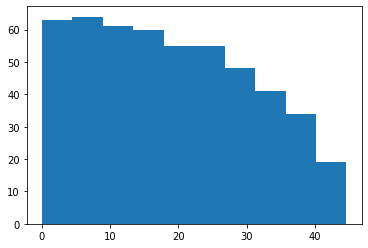

In [11]:
plt.hist(s)

![](spectrum.png)

#### Traditional and Heavy-Tailed Self Regularization in Neural Network Models
Charles H. Martin, Michael W. Mahoney



### Claim: 

#### The spectrum of a "well-trained" network should follow certain shape

In [14]:
import torch
from torchvision import models
from torchsummary import summary

In [27]:
resnet18 = models.resnet18(pretrained=True)
model = resnet18

In [28]:
W = model.layer1[0].conv1.weight.detach().numpy()

all_s = []

In [29]:
W.shape

(64, 64, 3, 3)

In [30]:
for i in range(3):
    s = np.linalg.svd(W[:,:,i,i],compute_uv = False)
    all_s.extend(s.tolist())

(array([50., 28., 18., 17., 14., 12.,  8.,  7.,  6.,  6.,  4.,  2.,  3.,
         1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.82300217e-10, 5.66943647e-02, 1.13388729e-01, 1.70083094e-01,
        2.26777458e-01, 2.83471823e-01, 3.40166187e-01, 3.96860552e-01,
        4.53554917e-01, 5.10249281e-01, 5.66943646e-01, 6.23638010e-01,
        6.80332375e-01, 7.37026739e-01, 7.93721104e-01, 8.50415468e-01,
        9.07109833e-01, 9.63804197e-01, 1.02049856e+00, 1.07719293e+00,
        1.13388729e+00, 1.19058166e+00, 1.24727602e+00, 1.30397038e+00,
        1.36066475e+00, 1.41735911e+00, 1.47405348e+00, 1.53074784e+00,
        1.58744221e+00, 1.64413657e+00, 1.70083094e+00, 1.75752530e+00,
        1.81421967e+00, 1.87091403e+00, 1.92760839e+00, 1.98430276e+00,
        2.04099712e+00, 2.09769149e+00, 2.15438585e+00, 2.21108022e+

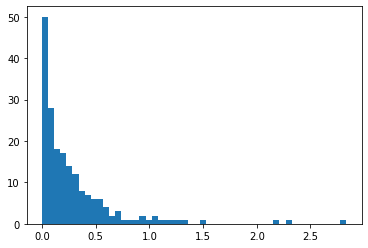

In [31]:
plt.hist(all_s, bins=50)

lognorm: average log Frobenius Norm = $ 1/L * \sum_l log (\| W_l \|_F) $ 




![](vgg.png)

## Fit a power law

$\rho(\lambda) \sim \lambda^{-\alpha} $

(array([50., 28., 18., 17., 14., 12.,  8.,  7.,  6.,  6.,  4.,  2.,  3.,
         1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.82300217e-10, 5.66943647e-02, 1.13388729e-01, 1.70083094e-01,
        2.26777458e-01, 2.83471823e-01, 3.40166187e-01, 3.96860552e-01,
        4.53554917e-01, 5.10249281e-01, 5.66943646e-01, 6.23638010e-01,
        6.80332375e-01, 7.37026739e-01, 7.93721104e-01, 8.50415468e-01,
        9.07109833e-01, 9.63804197e-01, 1.02049856e+00, 1.07719293e+00,
        1.13388729e+00, 1.19058166e+00, 1.24727602e+00, 1.30397038e+00,
        1.36066475e+00, 1.41735911e+00, 1.47405348e+00, 1.53074784e+00,
        1.58744221e+00, 1.64413657e+00, 1.70083094e+00, 1.75752530e+00,
        1.81421967e+00, 1.87091403e+00, 1.92760839e+00, 1.98430276e+00,
        2.04099712e+00, 2.09769149e+00, 2.15438585e+00, 2.21108022e+

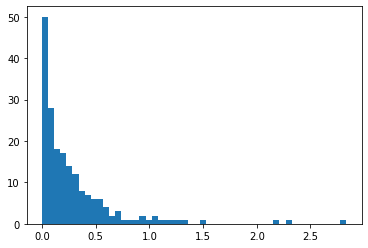

In [32]:
plt.hist(all_s, bins=50)

In [33]:
from scipy.optimize import curve_fit

def powlaw(x, a, b) :
    return a * np.power(x, b)
def linlaw(x, a, b) :
    return a + x * b

def curve_fit_log(xdata, ydata) :
    popt_log, pcov_log = curve_fit(linlaw, np.log10(xdata), np.log10(ydata))
    ydatafit_log = np.power(10, linlaw(np.log10(xdata), *popt_log))
    return (popt_log, pcov_log, ydatafit_log)

In [34]:
ydata = s.tolist()
xdata = list(range(1,65))
popt_log, pcov_log, ydatafit_log = curve_fit_log(xdata, ydata)

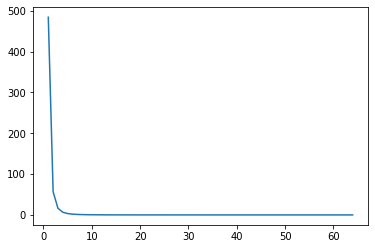

In [35]:
plt.plot(xdata, ydatafit_log)

In [36]:
popt_log

array([ 2.6850235 , -3.09234789])

In [37]:
import weightwatcher as ww
watcher = ww.WeightWatcher(model=resnet18)
results = watcher.analyze()

summary = watcher.get_summary()
watcher.print_results()

Using TensorFlow backend.
2020-04-30 11:18:22,728 INFO 

python      version 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.17.4
tensforflow version 2.1.0
keras       version 2.3.1
2020-04-30 11:18:22,728 INFO Analyzing model
2020-04-30 11:18:22,891 INFO ### Printing results ###
2020-04-30 11:18:26,662 INFO Check: min: 0.0327934855462768, max: 11.081007648646798, avg: 1.967085077860561
2020-04-30 11:18:26,663 INFO Check compound: min: 0.0327934855462768, max: 4.608429293995098, avg: 1.0837349588373042
2020-04-30 11:18:26,663 INFO CheckTF: min: False, max: True, avg: 0.700507614213198
2020-04-30 11:18:26,664 INFO CheckTF compound: min: 0.0, max: 1.0, avg: 0.7301587301587302
2020-04-30 11:18:26,664 INFO Norm: min: 4.223808288574219, max: 35.14375305175781, avg: 11.022862434387207
2020-04-30 11:18:26,665 INFO Norm compound: min: 4.223808288574219, max: 35.14375305175781, avg: 11.3870267868042
2020-

In [38]:
summary

{'check': 1.967085077860561,
 'check_compound': 1.0837349588373042,
 'checkTF': 0.700507614213198,
 'checkTF_compound': 0.7301587301587302,
 'norm': 11.022862,
 'norm_compound': 11.387027,
 'lognorm': 1.0035583,
 'lognorm_compound': 0.99185735,
 'normX': 17.080376,
 'normX_compound': 18.941336,
 'lognormX': 1.1624378,
 'lognormX_compound': 1.1254189}

In [39]:
resnet18 = models.resnet18(pretrained=True)
resnet34 = models.resnet34(pretrained=True)
resnet50 = models.resnet50(pretrained=True)

vgg16 = models.vgg16(pretrained=True)
vgg19 = models.vgg19(pretrained=True)


model_list = ["resnet18", "resnet34", "resnet50", "vgg16", "vgg19"]
summaries = {}

In [40]:
for m in model_list:
    watcher = ww.WeightWatcher(model=eval(m))
    results = watcher.analyze();
    summaries[m] = watcher.get_summary();

2020-04-30 11:18:53,590 INFO 

python      version 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.17.4
tensforflow version 2.1.0
keras       version 2.3.1
2020-04-30 11:18:53,591 INFO Analyzing model
2020-04-30 11:18:53,748 INFO ### Printing results ###
2020-04-30 11:18:57,566 INFO Check: min: 0.0327934855462768, max: 11.081007648646798, avg: 1.967085077860561
2020-04-30 11:18:57,567 INFO Check compound: min: 0.0327934855462768, max: 4.608429293995098, avg: 1.0837349588373042
2020-04-30 11:18:57,568 INFO CheckTF: min: False, max: True, avg: 0.700507614213198
2020-04-30 11:18:57,568 INFO CheckTF compound: min: 0.0, max: 1.0, avg: 0.7301587301587302
2020-04-30 11:18:57,568 INFO Norm: min: 4.223808288574219, max: 35.14375305175781, avg: 11.022862434387207
2020-04-30 11:18:57,569 INFO Norm compound: min: 4.223808288574219, max: 35.14375305175781, avg: 11.3870267868042
2020-04-30 11:18:57,569 INFO Lo

In [41]:
for k,v in summaries.items():
    print(k, summaries[k]['lognormX'])

resnet18 1.1624378
resnet34 0.9241724
resnet50 0.84587806
vgg16 1.4113396
vgg19 1.3474483
